<a href="https://colab.research.google.com/github/amirnugroho/UAS_DeepLearning/blob/main/4_TabNet_Regressor_(NASA_FIRMS_MODIS)_Fix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23542 entries, 0 to 23541
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    23542 non-null  float64
 1   longitude   23542 non-null  float64
 2   brightness  23542 non-null  float64
 3   scan        23542 non-null  float64
 4   track       23542 non-null  float64
 5   acq_date    23542 non-null  object 
 6   acq_time    23542 non-null  int64  
 7   satellite   23542 non-null  object 
 8   instrument  23542 non-null  object 
 9   confidence  23542 non-null  int64  
 10  version     23542 non-null  float64
 11  bright_t31  23542 non-null  float64
 12  frp         23542 non-null  float64
 13  daynight    23542 non-null  object 
 14  type        23542 non-null  int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 2.7+ MB

Basic Statistics:
            latitude     longitude   brightness          scan         track  \
count   23542

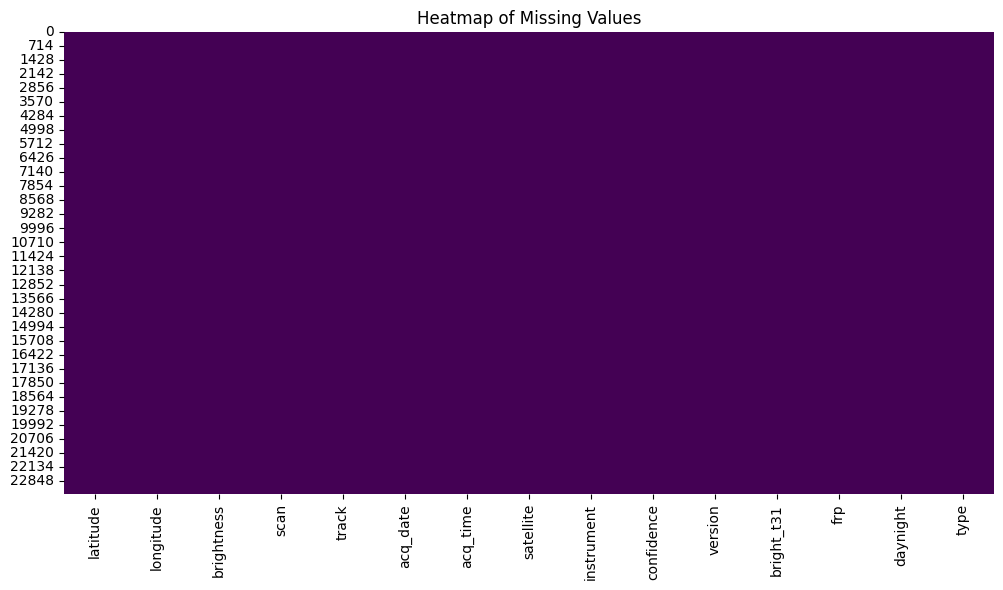


Numerical Columns: ['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_time', 'confidence', 'version', 'bright_t31', 'frp', 'type']

Categorical Columns: ['acq_date', 'satellite', 'instrument', 'daynight']

Cleaned DataFrame head:
   latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0   -3.2651   114.9702       311.4   1.0    1.0  2024-01-01       214   
1   -1.8920   115.8655       305.4   1.0    1.0  2024-01-01       214   
2   -2.5788   121.3839       330.2   2.2    1.4  2024-01-01       214   
3   -8.2804   123.4017       310.9   4.0    1.9  2024-01-01       216   
4   -8.2846   123.4369       311.7   4.0    1.9  2024-01-01       216   

  satellite instrument  confidence  version  bright_t31   frp daynight  type  
0     Terra      MODIS          59    61.03       285.7   6.9        D     0  
1     Terra      MODIS          36    61.03       276.5   3.7        D     2  
2     Terra      MODIS          85    61.03       292.2  82.2        D     2  
3  

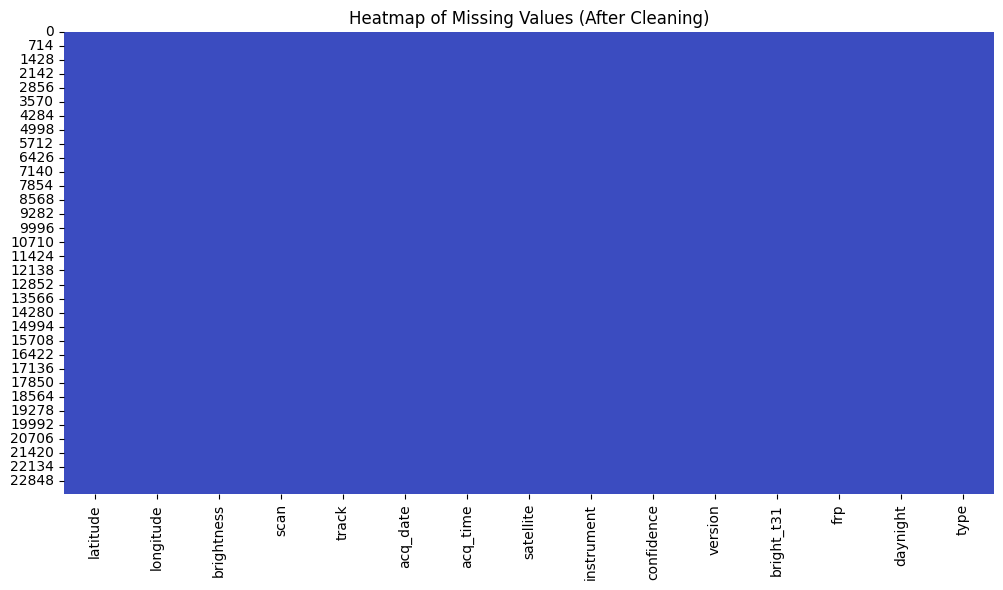


Missing Values after cleaning:
latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Muat dataset dari path yang Anda unggah
file_path = '/content/modis_2024_Indonesia.csv'
df = pd.read_csv(file_path)

# 1. Basic Information
print("Dataset Information:")
df.info()

print("\nBasic Statistics:")
print(df.describe(include='all'))

# 2. Check for Missing Values
print("\nMissing Values:")
print(df.isnull().sum())

# Visualizing Missing Values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap of Missing Values")
plt.show()

# 3. Numerical Columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
print("\nNumerical Columns:", numerical_columns.tolist())

# 4. Categorical Columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("\nCategorical Columns:", categorical_columns.tolist())

# Membersihkan data dengan mengisi nilai yang hilang
# Strategi ini (forward-fill lalu backward-fill) lebih aman daripada menghapus kolom
df_cleaned = df.ffill().bfill()
print("\nCleaned DataFrame head:")
print(df_cleaned.head())

# Visualizing Missing Values after cleaning
plt.figure(figsize=(12, 6))
sns.heatmap(df_cleaned.isnull(), cbar=False, cmap='coolwarm')
plt.title("Heatmap of Missing Values (After Cleaning)")
plt.show()

# Check for Missing Values after cleaning
print("\nMissing Values after cleaning:")
print(df_cleaned.isnull().sum())

In [2]:
import numpy as np

# Check for invalid values
invalid_values = df_cleaned.isin([np.inf, -np.inf]).sum()
print("Columns with invalid values (inf or -inf):")
print(invalid_values[invalid_values > 0])


Columns with invalid values (inf or -inf):
Series([], dtype: int64)


In [3]:
# Replace inf and -inf with NaN
df_cleaned.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values if needed
df_cleaned.fillna(0, inplace=True)  # Replace NaN with 0, or use another strategy


In [4]:
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Generate the overview
overview = {
    "Shape": df_cleaned.shape,
    "Columns": df_cleaned.columns.tolist(),
    "Data Types": df_cleaned.dtypes,
    "Missing Values": df_cleaned.isnull().sum(),
    "Summary Statistics": df_cleaned.describe(include="all")
}

print(overview)


{'Shape': (23542, 15), 'Columns': ['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date', 'acq_time', 'satellite', 'instrument', 'confidence', 'version', 'bright_t31', 'frp', 'daynight', 'type'], 'Data Types': latitude      float64
longitude     float64
brightness    float64
scan          float64
track         float64
acq_date       object
acq_time        int64
satellite      object
instrument     object
confidence      int64
version       float64
bright_t31    float64
frp           float64
daynight       object
type            int64
dtype: object, 'Missing Values': latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64, 'Summary Statistics':             latitude     longitude   brightness          scan         track  \
count   23542.000000  23542.000000  23542.00000  23542.0000

In [5]:
pip install pytorch-tabnet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 46.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12

In [1]:
!pip install --upgrade scikit-learn

In [5]:
# Required Libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from pytorch_tabnet.tab_model import TabNetRegressor
import torch

# ==============================================================================
# PERBAIKAN 1: Muat data Anda di sini
# GANTI 'nama_file_anda.csv' DENGAN NAMA FILE DATA ANDA YANG SEBENARNYA
# ==============================================================================
df_cleaned = pd.read_csv('modis_2024_Indonesia.csv')

# Step 1: Clean Data
df_cleaned.columns = df_cleaned.columns.str.strip()  # Baris ini sekarang akan berhasil

# Step 2: Define Target and Features
target_column = 'confidence'  # Target variable
X = df_cleaned.drop(columns=[target_column])  # Features
y = df_cleaned[target_column]  # Target

# Step 3: Identify Categorical and Numerical Columns
categorical_columns = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Step 4: Handle Missing Values
numerical_imputer = SimpleImputer(strategy='mean')
X[numerical_columns] = numerical_imputer.fit_transform(X[numerical_columns])
categorical_imputer = SimpleImputer(strategy='most_frequent')
X[categorical_columns] = categorical_imputer.fit_transform(X[categorical_columns])

# Step 5: Encode Categorical Variables
ordinal_encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
X[categorical_columns] = ordinal_encoder.fit_transform(X[categorical_columns])

# Step 6: Split Dataset into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Convert to NumPy arrays (required for TabNet)
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()
y_train_np = y_train.to_numpy().reshape(-1, 1)
y_test_np = y_test.to_numpy().reshape(-1, 1)

# Step 7: Define TabNet Regressor
tabnet_model = TabNetRegressor(
    n_d=8,
    n_a=8,
    n_steps=3,
    gamma=1.5,
    lambda_sparse=1e-3,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    scheduler_params={"step_size": 10, "gamma": 0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type="sparsemax"
)

# Step 8: Train the Model
tabnet_model.fit(
    X_train=X_train_np,
    y_train=y_train_np,
    eval_set=[(X_train_np, y_train_np), (X_test_np, y_test_np)],
    eval_name=['train', 'valid'],
    eval_metric=['rmse'],
    max_epochs=100,
    patience=10,
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)

# Step 9: Evaluate the Model
y_pred = tabnet_model.predict(X_test_np)

# ==============================================================================
# PERBAIKAN 2: Hitung RMSE secara manual agar kompatibel dengan scikit-learn versi lama
# ==============================================================================
mae = mean_absolute_error(y_test_np, y_pred)
# Hitung Mean Squared Error (MSE) dulu
mse = mean_squared_error(y_test_np, y_pred)
# Lalu hitung akarnya (Root) untuk mendapatkan RMSE
rmse = np.sqrt(mse)
r2 = r2_score(y_test_np, y_pred)

print(f"Model Performance:")
print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")

# Step 10: Feature Importance
feature_importances = tabnet_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': numerical_columns + categorical_columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importance_df)

# Step 11: Save the Model
tabnet_model.save_model("tabnet_regressor_model")

# Step 12: Load the Model (Optional)
loaded_model = TabNetRegressor()
loaded_model.load_model("tabnet_regressor_model.zip")

print("\nModel saved and loaded successfully.")

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4114.6937| train_rmse: 78.81793| valid_rmse: 79.71592|  0:00:02s
epoch 1  | loss: 3269.40104| train_rmse: 176.82307| valid_rmse: 177.6246|  0:00:04s
epoch 2  | loss: 1741.80113| train_rmse: 144.45188| valid_rmse: 144.06238|  0:00:05s
epoch 3  | loss: 481.52376| train_rmse: 93.44848| valid_rmse: 94.46411|  0:00:07s
epoch 4  | loss: 266.06779| train_rmse: 69.1227 | valid_rmse: 68.75272|  0:00:08s
epoch 5  | loss: 246.50566| train_rmse: 54.9987 | valid_rmse: 54.98278|  0:00:10s
epoch 6  | loss: 238.2594| train_rmse: 51.71353| valid_rmse: 51.40239|  0:00:12s
epoch 7  | loss: 227.33869| train_rmse: 31.15999| valid_rmse: 30.70504|  0:00:13s
epoch 8  | loss: 225.20399| train_rmse: 25.53423| valid_rmse: 25.31629|  0:00:14s
epoch 9  | loss: 218.18249| train_rmse: 29.14857| valid_rmse: 28.89365|  0:00:16s
epoch 10 | loss: 215.57164| train_rmse: 29.11816| valid_rmse: 28.75627|  0:00:17s
epoch 11 | loss: 213.63568| train_rmse: 25.67846| valid_rmse: 25.33836|  0:00:18s
epoch 12 | l

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Model Performance:
MAE: 9.1370, RMSE: 13.5393, R²: 0.5914

Feature Importances:
       Feature  Importance
2   brightness    0.344242
8          frp    0.198750
13    daynight    0.169328
12  instrument    0.098453
4        track    0.062307
6      version    0.053173
10    acq_date    0.018656
11   satellite    0.015513
1    longitude    0.014920
0     latitude    0.014608
3         scan    0.004991
5     acq_time    0.004805
7   bright_t31    0.000254
9         type    0.000000
Successfully saved model at tabnet_regressor_model.zip

Model saved and loaded successfully.


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


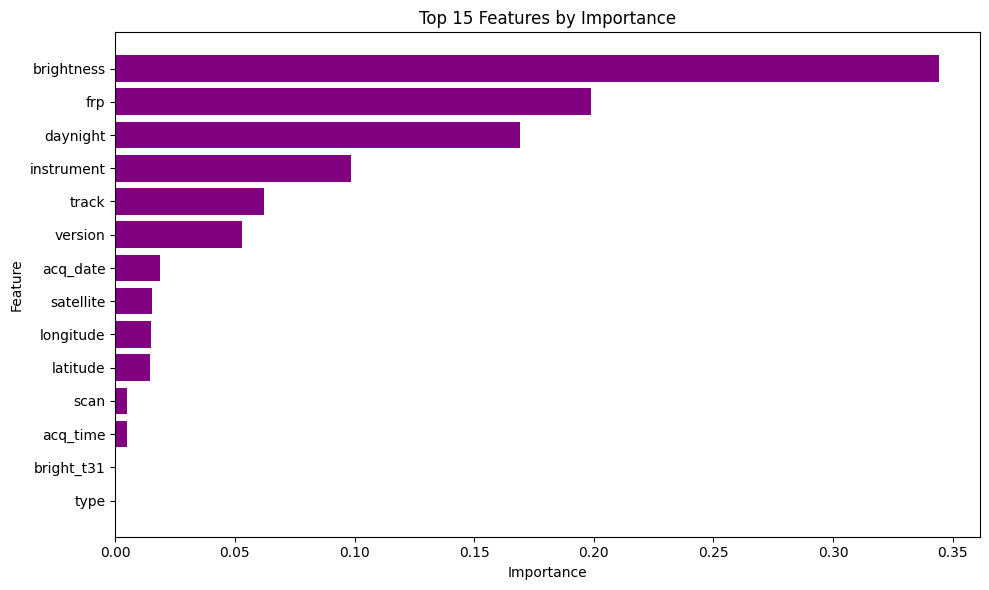

In [8]:
import matplotlib.pyplot as plt

# Extract feature names and importances from the code
feature_names = numerical_columns + categorical_columns
importances = tabnet_model.feature_importances_

# Create a DataFrame directly from the variables
feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot the top 15 features
top_features = feature_importance_df.head(15).sort_values(by="Importance", ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(top_features["Feature"], top_features["Importance"], color="purple")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 15 Features by Importance")
plt.tight_layout()
plt.show()

Generating Dynamic Plots...


/tmp/ipython-input-2578417315.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette="viridis")


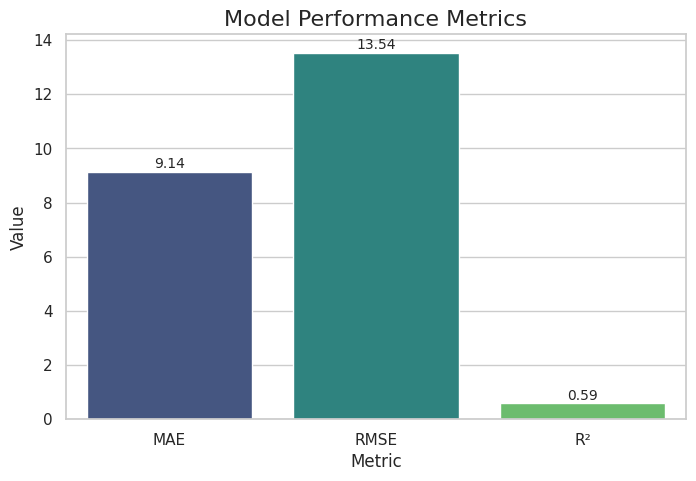

/tmp/ipython-input-2578417315.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


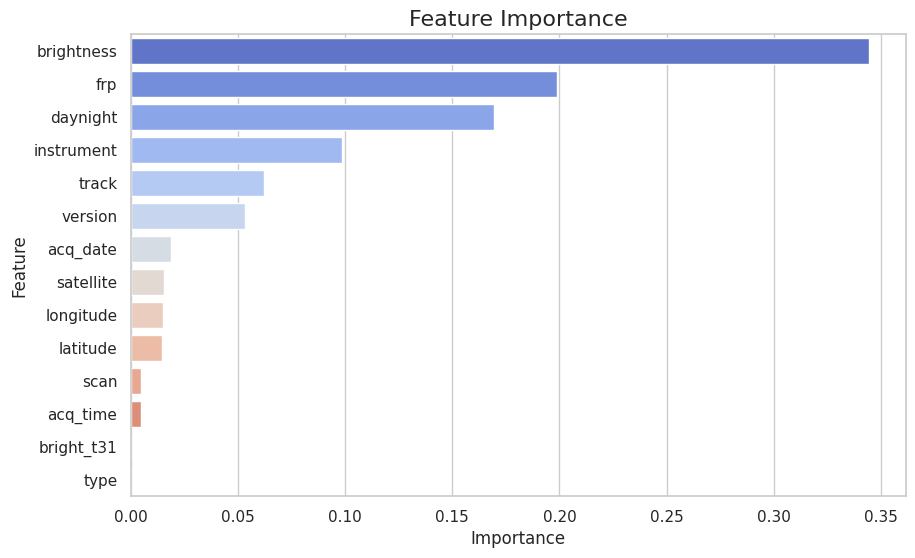

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set plot style for consistency
sns.set(style="whitegrid")

# Function to plot model performance metrics dynamically
def plot_model_performance(model, X_test, y_test):
    # Predict on test data
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Adjust negative R² for display
    metrics = ['MAE', 'RMSE', 'R²']
    values = [mae, rmse, r2]

    # Plot the metrics
    plt.figure(figsize=(8, 5))
    sns.barplot(x=metrics, y=values, palette="viridis")
    plt.title("Model Performance Metrics", fontsize=16)
    plt.ylabel("Value")
    plt.xlabel("Metric")
    for i, v in enumerate(values):
        plt.text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom', fontsize=10)
    plt.show()

# Function to plot feature importances dynamically
def plot_feature_importances(model, feature_names):
    # Get feature importances
    feature_importances = model.feature_importances_

    # Create a DataFrame for better visualization
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)

    # Plot the feature importances
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x="Importance", y="Feature", data=feature_importance_df, palette="coolwarm"
    )
    plt.title("Feature Importance", fontsize=16)
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.show()

# Generate Dynamic Visualizations
print("Generating Dynamic Plots...")

# Get feature names by combining numerical and categorical columns
feature_names = numerical_columns + categorical_columns

# Plot Model Performance Metrics
plot_model_performance(tabnet_model, X_test_np, y_test_np)

# Plot Feature Importances
plot_feature_importances(tabnet_model, feature_names)
